You need to make a copy to your own Google drive if you want to edit the original notebook! Start by opening this notebook on Colab 👇

<a href="https://colab.research.google.com/github/PJalgotrader/Machine_Learning-USU/blob/fall22/Lectures/Class15-KNN(Python)/KNN_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 



![logo](https://upload.wikimedia.org/wikipedia/commons/4/44/Huntsman-Wordmark-with-USU-Blue.gif#center) 



## 🔗 Links
[![Youtube](https://img.shields.io/badge/youtube_channel-1DA1F2?style=for-the-badge&logo=youtube&logoColor=white&color=red)](https://www.youtube.com/channel/UCNDElcuuyX-2pSatVBDpJJQ)
[![Profile](https://img.shields.io/badge/profiole-000?style=for-the-badge&logo=ko-fi&logoColor=white)](https://huntsman.usu.edu/directory/jahangiry-pedram)
[![linkedin](https://img.shields.io/badge/linkedin-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/pedram-jahangiry-cfa-5778015a)

---

# K Nearest Neigbors (KNN) - Regression

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings('ignore')

In [10]:
rand_state = 1000

In [11]:
!wget -nc https://raw.githubusercontent.com/PJalgotrader/Machine_Learning-USU/fall22/data/wage.csv
df = pd.read_csv("wage.csv")

File ‘wage.csv’ already there; not retrieving.



In [12]:
df.head()

,wage,hours,IQ,educ,exper,tenure,age,married,black,meduc,feduc
0,769000.0,40,93,12,11,2,31,1,0,8.0,8.0
1,808000.0,50,119,18,11,16,37,1,0,14.0,14.0
2,825000.0,40,108,14,11,9,33,1,0,14.0,14.0
3,650000.0,40,96,12,13,7,32,1,0,12.0,12.0
4,562000.0,40,74,11,14,5,34,1,0,6.0,11.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   wage     935 non-null    float64
 1   hours    935 non-null    int64  
 2   IQ       935 non-null    int64  
 3   educ     935 non-null    int64  
 4   exper    935 non-null    int64  
 5   tenure   935 non-null    int64  
 6   age      935 non-null    int64  
 7   married  935 non-null    int64  
 8   black    935 non-null    int64  
 9   meduc    857 non-null    float64
 10  feduc    741 non-null    float64
dtypes: float64(3), int64(8)
memory usage: 80.5 KB


## Data preprocessing 

In [15]:
df.isna().sum() /len(df) 

wage       0.000000
hours      0.000000
IQ         0.000000
educ       0.000000
exper      0.000000
tenure     0.000000
age        0.000000
married    0.000000
black      0.000000
meduc      0.083422
feduc      0.207487
dtype: float64

There is 20% missing values in feduc and 8.3% in meduc. We are going to impute feduc using linear regression. For meduc we will be using median meduc just for learning purposes. 

In [40]:
df['meduc'].fillna(df['meduc'].median(),axis=0, inplace=True )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   wage     935 non-null    float64
 1   hours    935 non-null    int64  
 2   IQ       935 non-null    int64  
 3   educ     935 non-null    int64  
 4   exper    935 non-null    int64  
 5   tenure   935 non-null    int64  
 6   age      935 non-null    int64  
 7   married  935 non-null    int64  
 8   black    935 non-null    int64  
 9   meduc    935 non-null    float64
 10  feduc    741 non-null    float64
dtypes: float64(3), int64(8)
memory usage: 80.5 KB


Fitting models using R-style formulas: https://www.statsmodels.org/dev/example_formulas.html

In [41]:
import statsmodels.formula.api as smf # this is very similar to R programming language. 

In [42]:
reg = smf.ols('feduc ~    IQ + educ +meduc  ', data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  feduc   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     150.7
Date:                Mon, 17 Oct 2022   Prob (F-statistic):           3.62e-76
Time:                        22:18:23   Log-Likelihood:                -1758.5
No. Observations:                 741   AIC:                             3525.
Df Residuals:                     737   BIC:                             3543.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8165      0.727     -2.497      0.013      -3.245      -0.388
IQ             0.0164      0.008      2.093      0.037       0.001       0.032
educ           0.3291      0.052      6.329      0.000       0.227       0.431
meduc          0.5430      0.037     14.619      0.000       0.470       0.616
==============================================================================
Omnibus:                        8.269   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                9.005
Skew:                          -0.187   Prob(JB):                       0.0111
Kurtosis:                       3.390   Cond. No.                         795.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
missing_predictions = reg.predict(df[['IQ','educ','meduc']])[df['feduc'].isna()]
missing_predictions

5       9.691238
7      10.316720
11     13.148295
18     11.025223
19      8.129423
         ...    
926     8.327000
927    10.301577
930    10.715012
932     7.193731
934    10.399741
Length: 194, dtype: float64

In [51]:
df.head(10)

,wage,hours,IQ,educ,exper,tenure,age,married,black,meduc,feduc
0,769000.0,40,93,12,11,2,31,1,0,8.0,8.0
1,808000.0,50,119,18,11,16,37,1,0,14.0,14.0
2,825000.0,40,108,14,11,9,33,1,0,14.0,14.0
3,650000.0,40,96,12,13,7,32,1,0,12.0,12.0
4,562000.0,40,74,11,14,5,34,1,0,6.0,11.0
5,1400000.0,40,116,16,14,2,35,1,1,8.0,NaN
6,600000.0,40,91,10,13,0,30,0,0,8.0,8.0
7,1081000.0,40,114,18,8,14,38,1,0,8.0,NaN
8,1154000.0,45,111,15,13,1,36,1,0,14.0,5.0
9,1000000.0,40,95,12,16,16,36,1,0,12.0,11.0


In [52]:
# prediction for 6th observation:
-1.8165 + 0.0164 * 116 + 0.3291 * 16 + 0.5430 * 8

9.6955

In [53]:
df['feduc'].fillna(missing_predictions,axis=0, inplace=True )


In [54]:
df.head(10)

,wage,hours,IQ,educ,exper,tenure,age,married,black,meduc,feduc
0,769000.0,40,93,12,11,2,31,1,0,8.0,8.000000
1,808000.0,50,119,18,11,16,37,1,0,14.0,14.000000
2,825000.0,40,108,14,11,9,33,1,0,14.0,14.000000
3,650000.0,40,96,12,13,7,32,1,0,12.0,12.000000
4,562000.0,40,74,11,14,5,34,1,0,6.0,11.000000
5,1400000.0,40,116,16,14,2,35,1,1,8.0,9.691238
6,600000.0,40,91,10,13,0,30,0,0,8.0,8.000000
7,1081000.0,40,114,18,8,14,38,1,0,8.0,10.316720
8,1154000.0,45,111,15,13,1,36,1,0,14.0,5.000000
9,1000000.0,40,95,12,16,16,36,1,0,12.0,11.000000


## Data visualization 

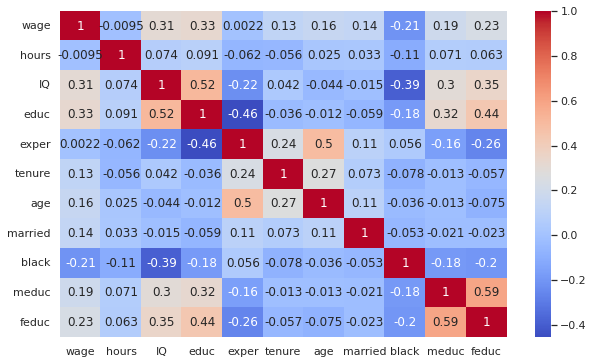

In [55]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm',annot=True)
plt.show()

## Scaling the features: 

The following step is very important for **KNN regression**. Because any variable on the larger scale, has a larger effect on the distance between observations. 

In this data set, because married and black are dummy variables, we don't need to standardize them! 

In [56]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_sc= scaler.fit_transform(df)

In [57]:
df_sc = pd.DataFrame(df_sc, columns=df.columns)
df_sc.head()

,wage,hours,IQ,educ,exper,tenure,age,married,black,meduc,feduc
0,-0.467520,-0.544210,-0.550521,-0.668851,-0.128912,-1.031884,-0.669710,0.346064,-0.383718,-1.015114,-0.701140
1,-0.371019,0.840756,1.177676,2.064038,-0.128912,1.728101,1.261947,0.346064,-0.383718,1.165962,1.270427
2,-0.328955,-0.544210,0.446516,0.242112,-0.128912,0.348108,-0.025824,0.346064,-0.383718,1.165962,1.270427
3,-0.761969,-0.544210,-0.351113,-0.668851,0.328518,-0.046175,-0.347767,0.346064,-0.383718,0.438937,0.613238
4,-0.979713,-0.544210,-1.813433,-1.124333,0.557234,-0.440459,0.296119,0.346064,-0.383718,-1.742140,0.284644


In [58]:
df_sc['married']=df['married']
df_sc['black']=df['black']
df_sc.head(3)

,wage,hours,IQ,educ,exper,tenure,age,married,black,meduc,feduc
0,-0.467520,-0.544210,-0.550521,-0.668851,-0.128912,-1.031884,-0.669710,1,0,-1.015114,-0.701140
1,-0.371019,0.840756,1.177676,2.064038,-0.128912,1.728101,1.261947,1,0,1.165962,1.270427
2,-0.328955,-0.544210,0.446516,0.242112,-0.128912,0.348108,-0.025824,1,0,1.165962,1.270427


### Defining the variables and splitting the data

In [59]:
y = df_sc['wage']
X = df_sc.drop('wage', axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

In [60]:
X_train.head()

,hours,IQ,educ,exper,tenure,age,married,black,meduc,feduc
932,0.148273,-1.614026,-0.668851,0.099803,0.545250,-1.635539,1,1,-1.378627,-0.966075
82,-0.544210,-0.351113,-1.124333,0.785949,-0.834743,1.261947,1,0,-1.015114,-0.701140
370,-0.544210,1.443552,1.608556,0.557234,-0.046175,1.583890,1,0,0.438937,-1.358328
452,-0.544210,0.512985,-0.668851,0.557234,-1.229026,0.940004,1,0,-0.651601,-1.029734
132,-0.544210,-0.284644,-0.668851,-0.357628,-0.637601,-0.669710,1,0,0.438937,0.613238


###  KNN Regression with Sklearn

In [61]:
from sklearn.neighbors import KNeighborsRegressor

In [111]:
# Fitting KNN regression to the Training set

KNN_regression = KNeighborsRegressor(n_neighbors=5)
KNN_regression.fit(X_train, y_train)

KNeighborsRegressor()

Minkowski distance: https://en.wikipedia.org/wiki/Minkowski_distance

In [112]:
# Predicting the Test set results
y_hat = KNN_regression.predict(X_test)

In [113]:
predictions = pd.DataFrame({ 'y_test':y_test,'y_hat':y_hat})
predictions.head()

,y_test,y_hat
434,0.042199,-0.606084
238,1.910343,1.566901
531,-0.700110,-0.831251
157,2.328510,0.906246
601,1.341239,0.591508


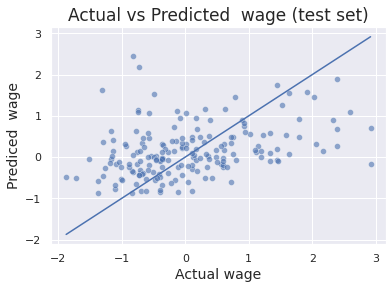

In [114]:
sns.scatterplot(x=y_test, y=y_hat, alpha=0.6)
sns.lineplot(y_test, y_test)

plt.xlabel('Actual wage', fontsize=14)
plt.ylabel('Prediced  wage', fontsize=14)
plt.title('Actual vs Predicted  wage (test set)', fontsize=17)
plt.show()

In [115]:
KNN_regression.score(X_train, y_train)

0.36109845395074536

In [116]:
KNN_regression.score(X_test, y_test)

0.0544536351627124

**Exercise**: 
* Now try k=748. What do you expect to see in the actual vs predicted plot?
* How about when k=1? can you plot the actual vs predictions in the train set?

----

## Performance metrics:

In [117]:
MSE_test = round(np.mean(np.square(y_test - y_hat)),2)
MSE_test

0.88

In [118]:
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

0.94

---

##  Cross validation

In KNN, we use cross validation to find the optimal value of K. 

In [94]:
from sklearn.model_selection import cross_val_score

In [95]:
NMSE = cross_val_score(estimator = KNN_regression, X = X_train, y = y_train, cv = 5 , scoring="neg_mean_squared_error" )

In [96]:
MSE_CV = round(np.mean(-NMSE),4)
MSE_CV

0.9973

In [97]:
RMSE_CV = round(np.sqrt(MSE_CV), 4)
RMSE_CV

0.9986

----------------

## Choosing K
 
Let's plot the RMSE_CV and RMSE_test vs K. 

In [98]:
RMSE_CV=[]
RMSE_test = []

k=40

for i in range(1,k):
    KNN_i = KNeighborsRegressor(n_neighbors=i)
    KNN_i.fit(X_train, y_train)
    RMSE_i = np.sqrt(np.mean(-1*cross_val_score(estimator = KNN_i, X = X_train, y = y_train, cv = 10 , scoring="neg_mean_squared_error" )))
    RMSE_CV.append(RMSE_i)
    
    RMSE_test.append(np.sqrt(np.mean(np.square(y_test - KNN_i.predict(X_test)))))
    
optimal_k = pd.DataFrame({'RMSE_CV': np.round(RMSE_CV,2), 'RMSE_test':np.round(RMSE_test,2), 'K':range(1,k)})

In [99]:
optimal_k.head(10)

,RMSE_CV,RMSE_test,K
0,1.19,1.27,1
1,1.10,1.10,2
2,1.04,1.00,3
3,1.01,0.96,4
4,0.99,0.94,5
5,0.99,0.92,6
6,0.98,0.90,7
7,0.97,0.89,8
8,0.96,0.89,9
9,0.96,0.89,10


In [100]:
np.argmin(optimal_k['RMSE_CV'])

20

In [101]:
optimal_k.loc[np.argmin(optimal_k['RMSE_CV']), 'K']

21

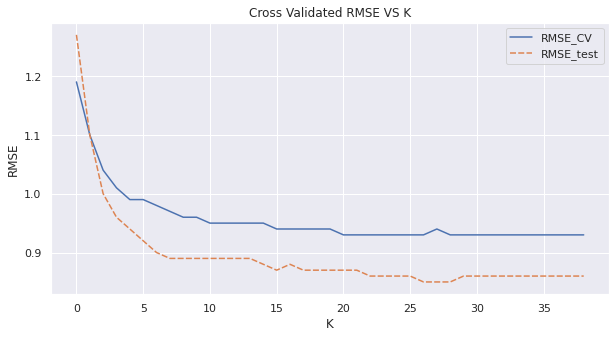

In [102]:
plt.figure(figsize=(10,5))
sns.lineplot(data=optimal_k.drop('K', axis=1))
plt.title('Cross Validated RMSE VS K')
plt.xlabel('K')
plt.ylabel('RMSE')
plt.show()

**Exercise**:

* By looking at this graph, What is the optimal K?
* Can you compare the optimal KNN model with multiple regression model? what do you learn?

###  Additional links:
1. Minkowski distance: https://en.wikipedia.org/wiki/Minkowski_distance
2. Behind the scenes of Nearest Neigbor search: https://www.analyticsvidhya.com/blog/2017/11/information-retrieval-using-kdtree/
3. BallTree vs KDTree vs Brute force KNN: https://towardsdatascience.com/tree-algorithms-explained-ball-tree-algorithm-vs-kd-tree-vs-brute-force-9746debcd940